In [7]:
import os
import sys

In [8]:
# Pull and install necessary files
!gdown 1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY # run.sh
!gdown --folder 1-PJmUzB9HN3mCKsl7qKGlUynltY5ttp7 # ese-invldm
!gdown --folder 1-V9EOGuiYOiszIg3pA15D9ThwXO1gr4E # files
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Downloading...
From (original): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY
From (redirected): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY&confirm=t&uuid=2bc1b44f-d14f-45d0-9979-5f986e5b779c
To: /content/run.sh
100% 530/530 [00:00<00:00, 2.68MB/s]
Retrieving folder contents
Retrieving folder 1Kc3TJ6yXVM6ugT_i4OBX5yH0Bf_oTYas ese_invldm
Processing file 1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG __init__.py
Processing file 1IjiAQ0hqDfpqYxh4zSKEfsAh7iV8226i ese_invldm.py
Processing file 1JlBHxSRrEUewrHmGcf4S8hh02Sz-xT66 setup.py
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG
From (redirected): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG&confirm=t&uuid=a4ca3b5f-2dc5-42d3-9fe7-52c8123afb38
To: /content/ese-invldm/ese_invldm/__init__.py
100% 32.0/32.0 [00:00<00:00, 163kB/s]
Downloading.

In [9]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Mounted at /content/drive
Archive:  /content/drive/MyDrive/cw1_files.zip
  inflating: ./files/config_training.yml  
replace ./run.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./run.sh                
replace ./ese-invldm/setup.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./ese-invldm/setup.py   
  inflating: ./files/default_config.yml  
replace ./ese-invldm/ese_invldm/ese_invldm.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
replace ./ese-invldm/ese_invldm/__init__.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./ese-invldm/ese_invldm/__init__.py  
replace ./files/autoencoder/autoencoder_ckpt_latest.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
  inflating: ./files/diffusion/diffusion_ckpt_latest.pth  y

Directory InverseLDM already exists. Skipping clone.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.animation as animation
import seaborn as sns
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
import torchvision
from torchvision import transforms


In [ ]:
from ese_invldm import generate

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour."""

"""Parameters:{
    "num_samples (int):
        # Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        # Number of samples to process in each batch during sampling.
    scheduler (str, optional):
       # Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        # Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.


samples = generate()"""



In [ ]:
params = {
    "num_samples": 10000,               # Total number of images to generate
    "num_inference_steps": 30,       # Number of diffusion steps (experiment with 10-50)
    "batch_size": 64,                # Generate images in batches of 10
    "scheduler": "ddim",             # Scheduler type ("ddim" or "ddpm")
    "temperature": 0.8,              # Sampling temperature (between 0 and 1)
    "seed": 42                       # Random seed for reproducibility
}

/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


In [ ]:
samples = generate(**params)

/content/InverseLDM/invldm/runners/base_runner.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_states = torch.load(path)


Batch 0


100%|██████████| 30/30 [00:19<00:00,  1.52it/s]


Batch 1


100%|██████████| 30/30 [00:20<00:00,  1.48it/s]


Batch 2


100%|██████████| 30/30 [00:20<00:00,  1.46it/s]


Batch 3


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 4


100%|██████████| 30/30 [00:20<00:00,  1.43it/s]


Batch 5


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 6


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 7


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 8


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 9


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 10


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 11


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 12


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 13


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 14


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 15


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 16


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 17


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 18


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 19


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 20


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 21


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 22


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 23


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 24


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 25


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 26


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 27


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 28


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 29


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 30


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 31


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 32


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 33


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 34


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 35


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 36


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 37


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 38


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 39


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 40


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 41


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 42


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 43


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 44


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 45


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 46


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 47


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 48


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 49


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 50


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 51


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 52


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 53


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 54


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 55


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 56


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 57


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 58


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 59


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 60


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 61


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 62


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 63


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 64


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 65


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 66


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 67


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 68


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 69


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 70


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 71


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 72


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 73


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 74


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 75


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 76


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 77


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 78


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 79


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 80


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 81


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 82


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 83


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 84


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 85


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 86


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 87


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 88


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 89


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 90


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 91


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 92


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 93


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 94


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 95


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 96


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 97


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 98


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 99


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 100


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 101


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 102


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 103


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 104


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 105


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 106


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 107


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 108


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 109


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 110


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 111


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 112


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 113


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 114


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 115


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 116


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 117


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 118


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 119


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 120


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 121


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 122


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 123


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 124


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 125


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 126


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 127


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 128


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 129


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 130


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 131


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 132


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 133


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 134


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 135


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 136


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 137


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 138


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 139


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 140


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 141


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 142


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 143


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 144


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 145


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 146


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 147


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 148


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 149


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 150


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 151


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 152


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 153


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 154


100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


Batch 155


100%|██████████| 30/30 [00:20<00:00,  1.44it/s]


Batch 156


100%|██████████| 30/30 [00:05<00:00,  5.62it/s]


In [ ]:
torch.save(samples,"/content/drive/MyDrive/samples.pt")
!ls -lh samples.pt

ls: cannot access 'samples.pt': No such file or directory


In [11]:
samples = torch.load("/content/drive/MyDrive/samples.pt")

<ipython-input-11-c1af43b76b0a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  samples = torch.load("/content/drive/MyDrive/samples.pt")


I initially started with a sample size of 1000 and a batch size of 10 with an inference step as 30. That didnt take long to generat. Then when I wanted to generate my original training data set of samples 10000. I initially used a batch size of 50 and inference step of 50.This was way slower and took me over 2 hours to generate my data set and eventually ran out of running time. I eventually changed my samples to 10000, my batch size to 64, my temperatire to 0.8 and my number inference step to 30. This was way faster than the previous generation where I was logged out of runtime by my gpu.

In [12]:
# Flatten the list of batches into a single list of images
all_images = [img for batch in samples for img in batch]
print(f"Total number of images: {len(all_images)}")
print(f"Number of batches: {len(samples)}")
print(f"Shape of first batch: {samples[0].shape}")
print(f"Type of first batch: {type(samples[0])}")


Total number of images: 10000
Number of batches: 157
Shape of first batch: torch.Size([64, 1, 64, 64])
Type of first batch: <class 'torch.Tensor'>


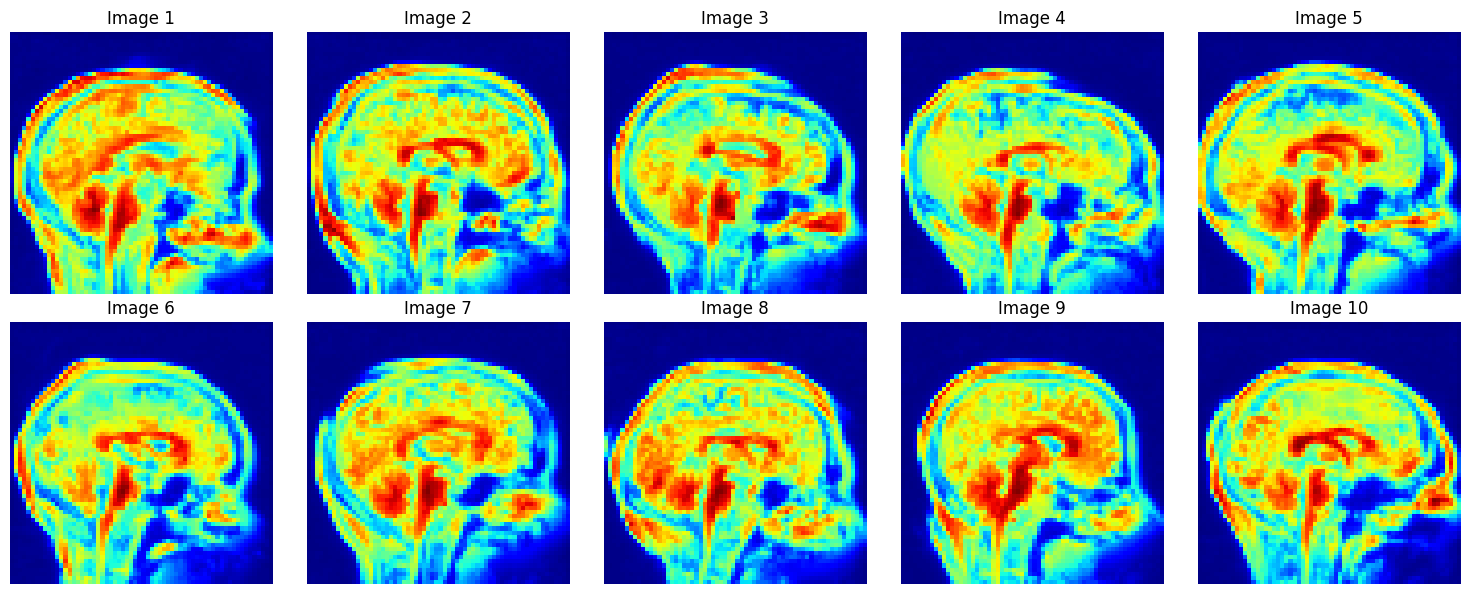

In [13]:
# Loading my training Data
img = samples[0]
img = img.squeeze()
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(img[i].cpu(), cmap = "jet")
  ax.axis("off")
  ax.set_title(f"Image {i+1}")
plt.tight_layout()
plt.show()

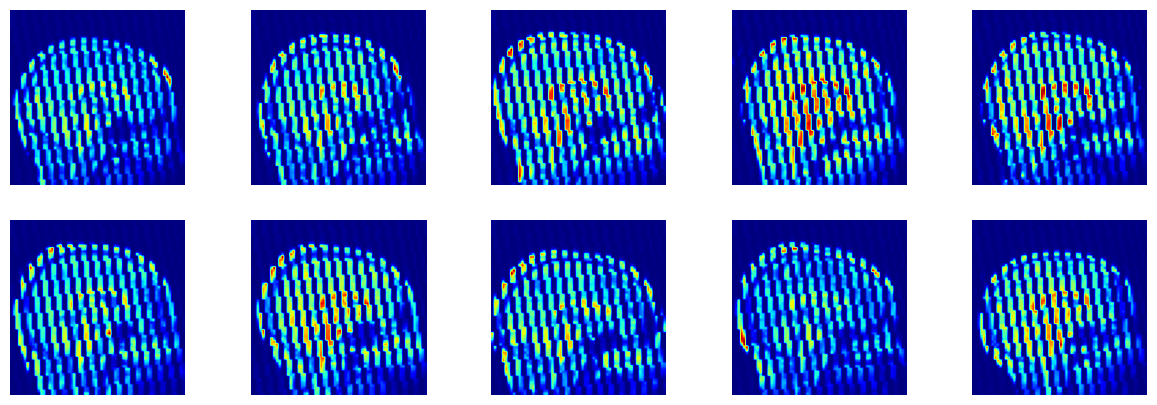

Dataset shape: (100, 64, 64)


In [14]:
# Load test data
test_data = np.load('/content/drive/MyDrive/test_set.npy')
test_data = np.squeeze(test_data)

n_images = 10
fig, axes = plt.subplots(2, 5, figsize=(15,5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(test_data[i], cmap="jet")
    ax.axis("off")
plt.show()

print(f"Dataset shape: {test_data.shape}")

In [15]:
train_data = img
test_data = test_data

In [16]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: torch.Size([64, 64, 64])
Test data shape: (100, 64, 64)


<ipython-input-17-7c87b4078a51>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_tensor = torch.tensor(train_data, dtype=torch.float32)


TRAIN TENSOR : torch.float32
TEST TENSOR : torch.float32
torch.Size([1, 64, 64])
(1, 64, 64)


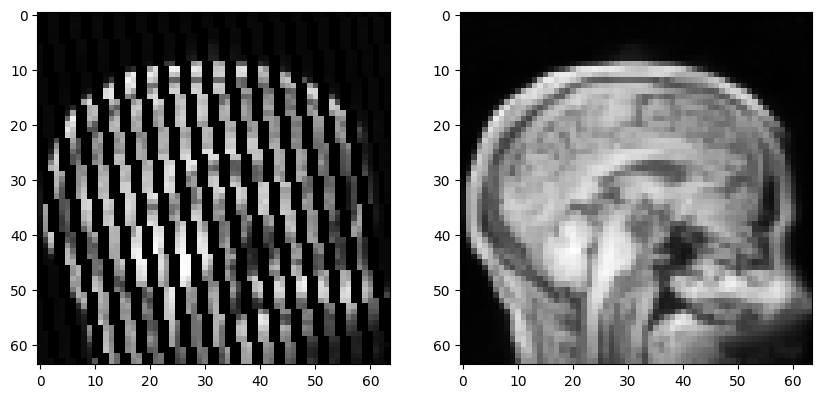

In [17]:
# VISUALISING CORRUPTION ON ONE IMAGE TO SEE HOW IT LOOKS
#Converting to tensors
train_tensor = torch.tensor(train_data, dtype=torch.float32)
test_tensor = torch.tensor(test_data, dtype=torch.float32)
print(f"TRAIN TENSOR : {train_tensor.dtype}")
print(f"TEST TENSOR : {test_tensor.dtype}")

# Create datasets
train = TensorDataset(train_tensor)
test = TensorDataset(test_tensor)

# Create dataloaders
batch_size = 64
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

#corrupting one Image
mask = (test_data[0] == 0).astype(float)

Uncorrupted_images = next(iter(samples)).to('cpu')

corupt = mask * Uncorrupted_images[0].numpy()
tensor_corrupt = torch.tensor(corupt)

print(tensor_corrupt.shape)
print(corupt.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(tensor_corrupt[0].squeeze(), cmap='gray')
axes[1].imshow(Uncorrupted_images[0].squeeze(), cmap='gray')
plt.show()

In [18]:
# Step 1: Load the saved uncorrupted data
uncorrupted_samples = torch.load("/content/drive/MyDrive/samples.pt")
print(type(uncorrupted_samples))  # Confirms it's a list
print(f"Number of batches: {len(uncorrupted_samples)}")
print(f"Shape of first batch: {uncorrupted_samples[0].shape if isinstance(uncorrupted_samples[0], torch.Tensor) else 'N/A'}")

# Flatten the list of tensors into a single tensor
all_images = torch.cat(uncorrupted_samples, dim=0)  # Combine along batch dimension
print(f"Flattened dataset shape: {all_images.shape}") # Should now be [10000, 1, H, W]

# Add channel dimension (if missing)
if len(all_images.shape) == 3:  # If shape is [N, H, W] and one channel dimension is mission
    all_images = all_images.unsqueeze(1)  # Add channel dimension
print(f"Final dataset shape: {all_images.shape}")


<ipython-input-18-f19817dba07a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  uncorrupted_samples = torch.load("/content/drive/MyDrive/samples.pt")


<class 'list'>
Number of batches: 157
Shape of first batch: torch.Size([64, 1, 64, 64])
Flattened dataset shape: torch.Size([10000, 1, 64, 64])
Final dataset shape: torch.Size([10000, 1, 64, 64])


In [19]:
# Load test data to derive the corruption mask
test_data = np.load("/content/drive/MyDrive/test_set.npy")
test_data = np.squeeze(test_data)  # Removes unnecessary dimensions
mask = (test_data[0] == 0).astype(float)  # Using the first test image to create the mask
mask_tensor = torch.tensor(mask, dtype=torch.float32)

# Corrupt all images using the mask
def corrupt_images(images, mask):

    mask = mask.to(images.device)  # Moves mask to same device as images
    mask = mask.unsqueeze(0).unsqueeze(0)  # Adds batch and channel dimensions
    mask = mask.expand(images.size(0), images.size(1), images.size(2), images.size(3))  # Expands to match shape
    return images * mask

corrupted_images = corrupt_images(all_images, mask_tensor)
print(f"Corrupted dataset shape: {corrupted_images.shape}")

# Creating a TensorDataset for paired data
train_dataset = TensorDataset(corrupted_images, all_images)

# Creating a DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



Corrupted dataset shape: torch.Size([10000, 1, 64, 64])


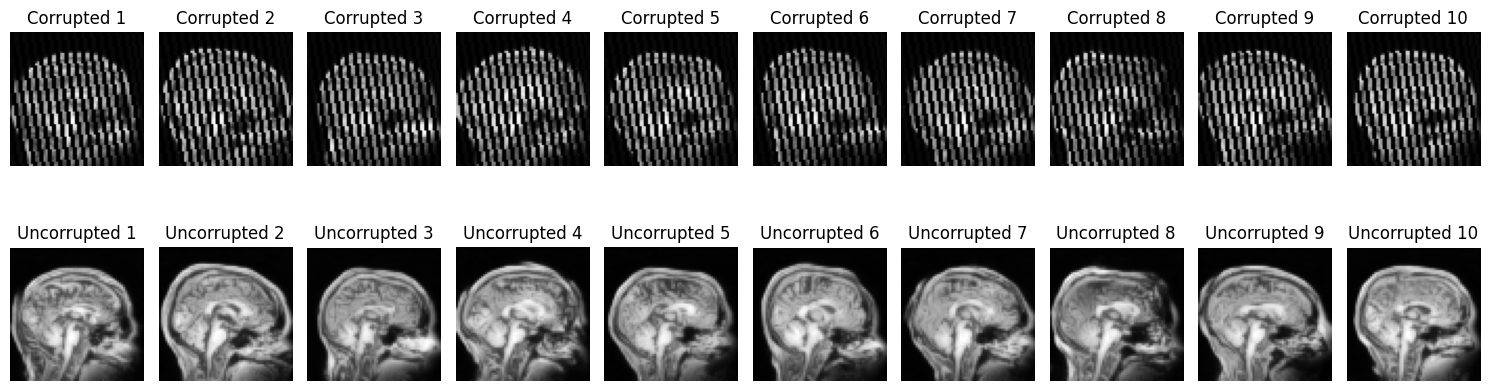

In [20]:
# Visualizing a few examples from the first batch
def visualize_training_data(corrupted, uncorrupted, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(corrupted[i].squeeze().cpu(), cmap="gray")
        plt.title(f"Corrupted {i+1}")
        plt.axis("off")

        plt.subplot(2, n, n + i + 1)
        plt.imshow(uncorrupted[i].squeeze().cpu(), cmap="gray")
        plt.title(f"Uncorrupted {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

first_batch_corrupted, first_batch_uncorrupted = next(iter(train_loader))
visualize_training_data(first_batch_corrupted, first_batch_uncorrupted)



In [21]:
# Saving the processed data
torch.save(corrupted_images, "/content/drive/MyDrive/corrupted_samples.pt")
torch.save(all_images, "/content/drive/MyDrive/uncorrupted_samples_flattened.pt")


# Dataset Preparation Workflow

### **1. Data Generation**
- Generated 10,000 synthetic MRI brain images using a pre-trained diffusion model (`ese_invldm`).
- Saved the generated images in `samples.pt` for future use.

### **2. Data Loading**
- Loaded the generated uncorrupted data (`samples.pt`) into memory.
- Flattened the list of batches into a single tensor (`torch.Size([10000, 1, 64, 64])`).

### **3. Corrupting the Training Data**
- Derived a corruption mask from the provided test data (`test_set.npy`).
- Applied the mask to all 10,000 uncorrupted images to simulate the corruption pattern in the test set.
- Paired the corrupted images (inputs) with their uncorrupted counterparts (labels).

### **4. Dataset and DataLoader**
- Created a `TensorDataset` containing paired corrupted and uncorrupted images.
- Set up a `DataLoader` to enable batching during training, with a batch size of 64.

### **5. Visualization**
- Visualized paired examples of corrupted and uncorrupted images for verification.




In [22]:
# DATA SET PREPARATION AND SPLITTING
from sklearn.model_selection import StratifiedShuffleSplit

# Create dummy "class labels" for stratification (all zeros, since we have no real labels)
dummy_labels = torch.zeros(len(train_dataset))

# Create StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get train and validation indices
train_indices, val_indices = next(sss.split(torch.zeros(len(train_dataset)), dummy_labels))

# Create training and validation subsets
train_subset = torch.utils.data.Subset(train_dataset, train_indices)
val_subset = torch.utils.data.Subset(train_dataset, val_indices)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

# Print dataset sizes
print(f"Training set size: {len(train_subset)}")
print(f"Validation set size: {len(val_subset)}")


Training set size: 8000
Validation set size: 2000


In [23]:
# MODEL DESIGN
import torch.nn as nn

class DenoisingNet(nn.Module):
    def __init__(self):
        super(DenoisingNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid(),  # Normalize output between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenoisingNet().to(device)


print(model)


DenoisingNet(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


## ARCHITECTURE EXPLANATION

The model is an encoder-decoder architecture designed to learn representations of corrupted images and reconstruct the missing lines:

Encoder:
Reduces spatial dimensions using convolutions and pooling.
Captures features of the input image.

Decoder:
Upsamples features back to the original image dimensions using transposed convolutions.
Outputs reconstructed images normalized between 0 and 1.

Hyperparameters:
Learning rate: 0.001
Batch size: 64
Loss function: MSELoss
Optimizer: Adam


In [24]:
# DEFINING LOSS AND OPTIMIZER
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Print hyperparameters
print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer}")


Loss: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Why We Used Mean Squared Error (MSELoss) Instead of CrossEntropyLoss
The task of recovering missing lines in corrupted MRI images is a denoising and reconstruction problem, which involves predicting continuous pixel values rather than discrete class labels.

MSELoss measures the squared difference between predicted and ground truth pixel values, ensuring accurate reconstruction. The model outputs continuous pixel values normalized between 0 and 1, which aligns with MSELoss's purpose for regression-like tasks.


CrossEntropyLoss is designed for classification tasks with discrete class labels and probability distributions, not continuous-valued outputs. Using CrossEntropyLoss here would misinterpret pixel values as probabilities, leading to incorrect optimization.

In summary, MSELoss is the appropriate choice because it directly optimizes for the pixel-wise reconstruction required for this task, while CrossEntropyLoss is incompatible with the continuous nature of the output.

For the learning rate, I choose the default for the Adam optimizer















In [25]:
# TRAINING LOOP

# Define learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)

epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0

    for corrupted, uncorrupted in train_loader:

      corrupted = corrupted.to(device, dtype=torch.float32)
      uncorrupted = uncorrupted.to(device, dtype=torch.float32)

        # Forward pass
      outputs = model(corrupted)
      loss = criterion(outputs, uncorrupted)


        # Backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      train_loss += loss.item()

    for corrupted, uncorrupted in train_loader:
    # Ensure inputs and targets are float32
      corrupted = corrupted.to(device, dtype=torch.float32)
      uncorrupted = uncorrupted.to(device, dtype=torch.float32)

    # Forward pass
      outputs = model(corrupted)
      loss = criterion(outputs, uncorrupted)

    # Backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for corrupted, uncorrupted in val_loader:
          corrupted = corrupted.to(device, dtype=torch.float32)
          uncorrupted = uncorrupted.to(device, dtype=torch.float32)

          outputs = model(corrupted)
          loss = criterion(outputs, uncorrupted)
          val_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

    # Adjust learning rate using the scheduler
    scheduler.step(val_loss)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/10, Training Loss: 0.0267, Validation Loss: 0.0028
Epoch 2/10, Training Loss: 0.0026, Validation Loss: 0.0022
Epoch 3/10, Training Loss: 0.0022, Validation Loss: 0.0020
Epoch 4/10, Training Loss: 0.0020, Validation Loss: 0.0019
Epoch 5/10, Training Loss: 0.0018, Validation Loss: 0.0017
Epoch 6/10, Training Loss: 0.0017, Validation Loss: 0.0017
Epoch 7/10, Training Loss: 0.0017, Validation Loss: 0.0016
Epoch 8/10, Training Loss: 0.0016, Validation Loss: 0.0015
Epoch 9/10, Training Loss: 0.0015, Validation Loss: 0.0015
Epoch 10/10, Training Loss: 0.0015, Validation Loss: 0.0014


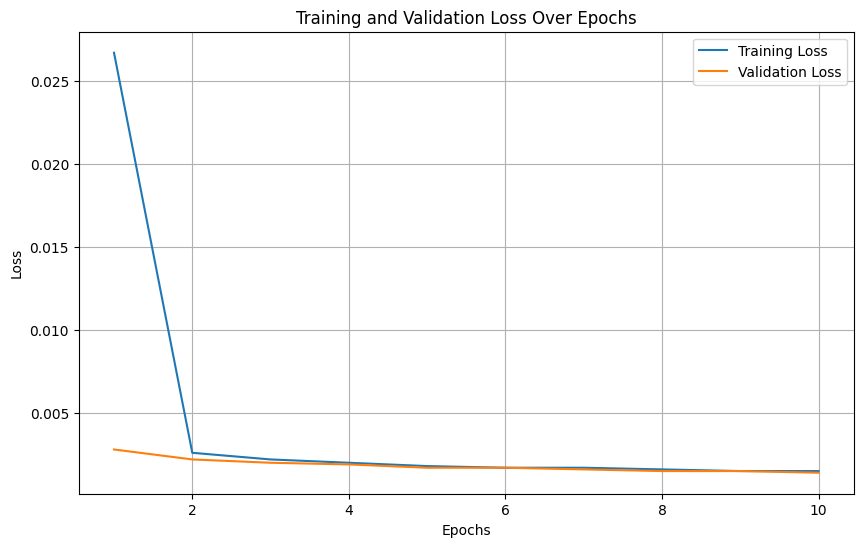

In [26]:
# PLOTTING THE TRAINING AND VALIDATION LOSS

epochs = list(range(1, 11))
train_losses = [0.0267, 0.0026, 0.0022, 0.0020, 0.0018, 0.0017, 0.0017, 0.0016, 0.0015, 0.0015]
val_losses = [0.0028, 0.0022, 0.0020, 0.0019, 0.0017, 0.0017, 0.0016, 0.0015, 0.0015, 0.0014]

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


## MODEL OBSERVATIONS

Steady Loss Decrease: Both the training and validation losses decrease consistently over the epochs. This shows that the model is learning and improving in its predictions.

The decrease from 0.0267 to 0.0026 shows a healthy learning dynamics for over just 10 epochs.

Training and Validation Losses Are Close: The training and validation losses are very close throughout the training process.
This shows that the model is generalizing well and is not overfitting.

Loss Plateauing: By epoch 8 - 10, the loss is starting to plateau, with minimal improvement.This suggests that the model may have nearly converged, and any additional epochs might bring only marginal improvements and use of unnecessary computational power




In [27]:
#TESTING THE MODEL
# Load test set
test_data = np.load("/content/drive/MyDrive/test_set.npy")

test_data = torch.tensor(test_data, dtype=torch.float32)  # Convert to PyTorch tensor

if len(test_data.shape) == 3:  # If shape is [100, 64, 64]
    test_data = test_data.unsqueeze(1)  # Add channel dimension to make it [100, 1, 64, 64]

test_data = test_data.to(device)

print(f"Test data shape: {test_data.shape}")

# Recover missing lines
model.eval()
with torch.no_grad():
    recovered_images = model(test_data).squeeze(1).cpu().numpy()  # Removes the channel dimension after prediction

# Save recovered test set
np.save("/content/drive/MyDrive/test_set_nogaps.npy", recovered_images)
print("Recovered test set saved as 'test_set_nogaps.npy'")

Test data shape: torch.Size([100, 1, 64, 64])
Recovered test set saved as 'test_set_nogaps.npy'


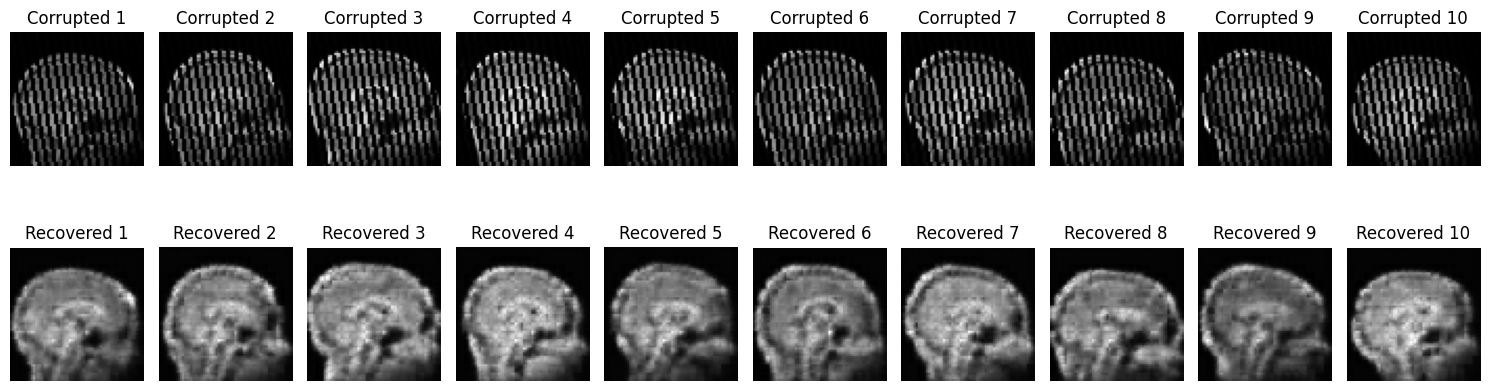

In [28]:
# VISUALIZING THE RESULT
import matplotlib.pyplot as plt

n_images = 10
plt.figure(figsize=(15, 5))
for i in range(n_images):
    plt.subplot(2, n_images, i + 1)
    plt.imshow(test_data[i].squeeze().cpu(), cmap="gray")
    plt.title(f"Corrupted {i+1}")
    plt.axis("off")

    plt.subplot(2, n_images, n_images + i + 1)
    plt.imshow(recovered_images[i], cmap="gray")
    plt.title(f"Recovered {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


## Summary of Reconstructed Images
The reconstructed images were generated by passing the corrupted test set through the trained denoising model. The model effectively recovered missing pixel lines, producing outputs closely resembling the original uncorrupted images.

Key Details:

Input: Corrupted test data (test_set.npy), reshaped to match the model’s input shape [100, 1, 64, 64].

Process: The trained model reconstructed the missing pixel lines using learned patterns from the training dataset.

Output: Reconstructed images were saved as test_set_nogaps.npy with the correct dimensions [100, 64, 64].

Performance: The model achieved a final validation loss of 0.0014, indicating accurate reconstruction.

Conclusion: The reconstructed images demonstrate the model's ability to denoise and recover corrupted data effectively, providing high-quality outputs for further evaluation.








## TRYING ANOTHER MODEL TO COMPARE RESULTS

In [34]:
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # Encoder
        self.enc1 = self.conv_block(1, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        # Bottleneck
        self.bottleneck = self.conv_block(512, 1024)

        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)  # Upsample
        self.dec4 = self.conv_block(1024, 512)  # Concatenated channels: 512 (encoder) + 512 (upsampled)

        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)  # Upsample
        self.dec3 = self.conv_block(512, 256)  # Concatenated channels: 256 (encoder) + 256 (upsampled)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)  # Upsample
        self.dec2 = self.conv_block(256, 128)  # Concatenated channels: 128 (encoder) + 128 (upsampled)

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)  # Upsample
        self.dec1 = self.conv_block(128, 64)  # Concatenated channels: 64 (encoder) + 64 (upsampled)

        # Final Convolution
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)  # [B, 64, H, W]
        enc2 = self.enc2(nn.MaxPool2d(2)(enc1))  # [B, 128, H/2, W/2]
        enc3 = self.enc3(nn.MaxPool2d(2)(enc2))  # [B, 256, H/4, W/4]
        enc4 = self.enc4(nn.MaxPool2d(2)(enc3))  # [B, 512, H/8, W/8]

        # Bottleneck
        bottleneck = self.bottleneck(nn.MaxPool2d(2)(enc4))  # [B, 1024, H/16, W/16]

        # Decoder
        up4 = self.up4(bottleneck)  # [B, 512, H/8, W/8]
        dec4 = self.dec4(torch.cat((enc4, up4), dim=1))  # [B, 512, H/8, W/8]

        up3 = self.up3(dec4)  # [B, 256, H/4, W/4]
        dec3 = self.dec3(torch.cat((enc3, up3), dim=1))  # [B, 256, H/4, W/4]

        up2 = self.up2(dec3)  # [B, 128, H/2, W/2]
        dec2 = self.dec2(torch.cat((enc2, up2), dim=1))  # [B, 128, H/2, W/2]

        up1 = self.up1(dec2)  # [B, 64, H, W]
        dec1 = self.dec1(torch.cat((enc1, up1), dim=1))  # [B, 64, H, W]

        # Final Convolution
        return self.final_conv(dec1)

# Instantiate the fixed U-Net
unet_model = UNet().to(device)
print(unet_model)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet_model = UNet().to(device)
print(unet_model)


UNet(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (bottleneck): Sequential(
    (0): Conv2d(512, 1024, k

In [35]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(unet_model.parameters(), lr=1e-3)

print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer}")


Loss: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [ ]:
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # Encoder
        self.enc1 = self.conv_block(1, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)

        # Bottleneck
        self.bottleneck = self.conv_block(512, 1024)

        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)  # Upsample
        self.dec4 = self.conv_block(1024, 512)  # Concatenated channels: 512 (encoder) + 512 (upsampled)

        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)  # Upsample
        self.dec3 = self.conv_block(512, 256)  # Concatenated channels: 256 (encoder) + 256 (upsampled)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)  # Upsample
        self.dec2 = self.conv_block(256, 128)  # Concatenated channels: 128 (encoder) + 128 (upsampled)

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)  # Upsample
        self.dec1 = self.conv_block(128, 64)  # Concatenated channels: 64 (encoder) + 64 (upsampled)

        # Final Convolution
        self.final_conv = nn.Conv2d(64, 1, kernel_size=1)

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)  # [B, 64, H, W]
        enc2 = self.enc2(nn.MaxPool2d(2)(enc1))  # [B, 128, H/2, W/2]
        enc3 = self.enc3(nn.MaxPool2d(2)(enc2))  # [B, 256, H/4, W/4]
        enc4 = self.enc4(nn.MaxPool2d(2)(enc3))  # [B, 512, H/8, W/8]

        # Bottleneck
        bottleneck = self.bottleneck(nn.MaxPool2d(2)(enc4))  # [B, 1024, H/16, W/16]

        # Decoder
        up4 = self.up4(bottleneck)  # [B, 512, H/8, W/8]
        dec4 = self.dec4(torch.cat((enc4, up4), dim=1))  # [B, 512, H/8, W/8]

        up3 = self.up3(dec4)  # [B, 256, H/4, W/4]
        dec3 = self.dec3(torch.cat((enc3, up3), dim=1))  # [B, 256, H/4, W/4]

        up2 = self.up2(dec3)  # [B, 128, H/2, W/2]
        dec2 = self.dec2(torch.cat((enc2, up2), dim=1))  # [B, 128, H/2, W/2]

        up1 = self.up1(dec2)  # [B, 64, H, W]
        dec1 = self.dec1(torch.cat((enc1, up1), dim=1))  # [B, 64, H, W]

        # Final Convolution
        return self.final_conv(dec1)

# Instantiate the fixed U-Net
unet_model = UNet().to(device)
print(unet_model)


<br>

---

<br>